# Classification Tree

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

We'll be trying to predict a classfication- whether a person is likely to get heart attack based on his/her cholestrol

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
heartData= pd.read_csv("dataset/heart.csv")
heartData.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heartData['output'] = heartData['output'].astype("category")

In [10]:
heartData['output'].describe()

count     303
unique      2
top         1
freq      165
Name: output, dtype: int64

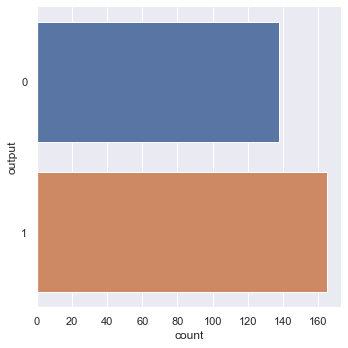

In [11]:
sb.catplot(y = 'output', data = heartData, kind = "count")

<AxesSubplot:xlabel='chol', ylabel='output'>

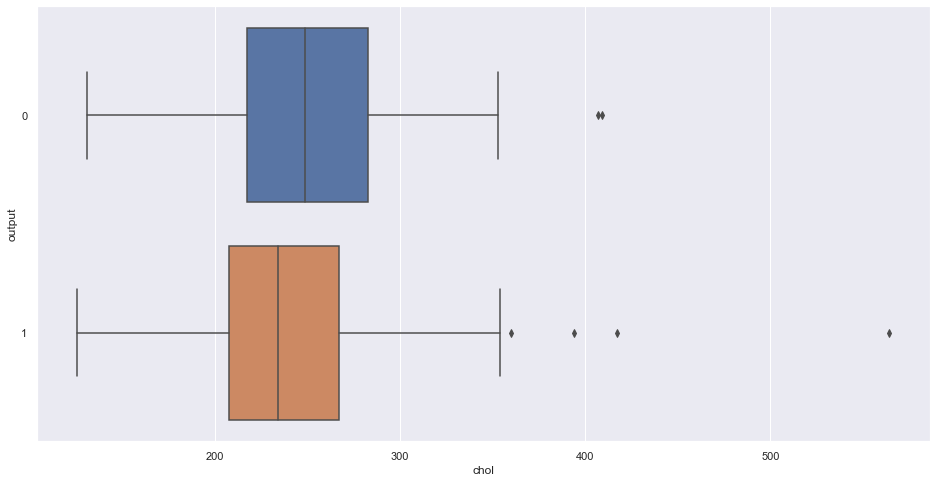

In [12]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'chol', y = 'output', data = heartData)

In [13]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [15]:
y = pd.DataFrame(heartData['output'])
X = pd.DataFrame(heartData['chol'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 56)

In [17]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

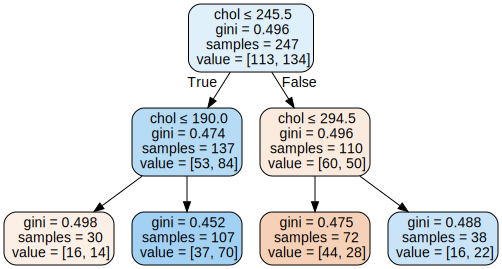

In [18]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.6153846153846154


<AxesSubplot:>

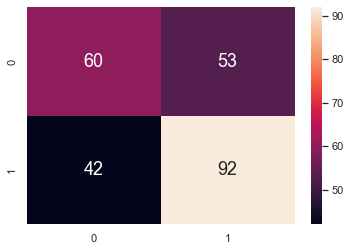

In [19]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})